# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Boston Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Boston Housing Data

We pre-processed the Boston Housing data again. This time, however, we did things slightly different:
- We dropped `'ZN'` and `'NOX'` completely 
- We categorized `'RAD'` in 3 bins and `'TAX'` in 4 bins
- We transformed `'RAD'` and `'TAX'` to dummy variables and dropped the first variable to eliminate multicollinearity
- We used min-max-scaling on `'B'`, `'CRIM'`, and `'DIS'` (and log transformed all of them first, except `'B'`)
- We used standardization on `'AGE'`, `'INDUS'`, `'LSTAT'`, and `'PTRATIO'` (and log transformed all of them first, except for `'AGE'`) 

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_features = boston_features.drop(['NOX', 'ZN'],axis=1)

# First, create bins for based on the values observed. 3 values will result in 2 bins
bins = [0, 6, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for based on the values observed. 4 values will result in 3 bins
bins = [0, 270, 360, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD','TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

In [17]:
age = boston_features['AGE']
b = boston_features['B']
logcrim = np.log(boston_features['CRIM'])
logdis = np.log(boston_features['DIS'])
logindus = np.log(boston_features['INDUS'])
loglstat = np.log(boston_features['LSTAT'])
logptratio = np.log(boston_features['PTRATIO'])

# Min-Max scaling
boston_features['B'] = (b-min(b))/(max(b)-min(b))
boston_features['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))

# Standardization
boston_features['AGE'] = (age-np.mean(age))/np.sqrt(np.var(age))
boston_features['INDUS'] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
boston_features['LSTAT'] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))
boston_features['PTRATIO'] = (logptratio-np.mean(logptratio))/(np.sqrt(np.var(logptratio)))

In [18]:
boston_features.head()

,CRIM,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(6, 24]","TAX_(270, 360]","TAX_(360, 712]"
0,0.000000,-1.704344,0.0,6.575,-0.120013,0.542096,-1.443977,1.000000,-1.275260,0,1,0
1,0.153211,-0.263239,0.0,6.421,0.367166,0.623954,-0.230278,1.000000,-0.263711,0,0,0
2,0.153134,-0.263239,0.0,7.185,-0.265812,0.623954,-0.230278,0.989737,-1.627858,0,0,0
3,0.171005,-1.778965,0.0,6.998,-0.809889,0.707895,0.165279,0.994276,-2.153192,0,0,0
4,0.250315,-1.778965,0.0,7.147,-0.511180,0.707895,0.165279,1.000000,-1.162114,0,0,0


## Run a linear model in statsmodels

In [19]:
# Your code here

X = boston_features
Y = pd.DataFrame(boston.target, columns=['price'])

In [20]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(Y,X_int).fit()
model.summary()

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     144.9
Date:                Thu, 31 Oct 2019   Prob (F-statistic):          5.08e-153
Time:                        17:00:04   Log-Likelihood:                -1458.2
No. Observations:                 506   AIC:                             2942.
Df Residuals:                     493   BIC:                             2997.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.6442      3.189      2.711      0.007       2.379      14.910
CRIM              -1.9538      2.115     -0.924      0.356      -6.110       2.202
INDUS             -0.8046      0.362     -2.220      0.027      -1.517      -0.093
CHAS               2.5959      0.796      3.260      0.001       1.032       4.160
RM                 2.6466      0.408      6.488      0.000       1.845       3.448
AGE                0.0794      0.352      0.226      0.821      -0.612       0.770
DIS              -10.0962      1.856     -5.439      0.000     -13.743      -6.449
PTRATIO           -1.4867      0.241     -6.160      0.000      -1.961      -1.013
B                  3.8412      0.986      3.897      0.000       1.905       5.778
LSTAT             -5.6288      0.354    -15.912      0.000      -6.324      -4.934
RAD_(6, 24]        1.3380      0.672      1.990      0.047       0.017       2.659
TAX_(270, 360]    -1.2598      0.600     -2.100      0.036      -2.438      -0.081
TAX_(360, 712]    -2.1461      0.704     -3.047      0.002      -3.530      -0.762
==============================================================================
Omnibus:                      106.730   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.101
Skew:                           0.891   Prob(JB):                     1.48e-94
Kurtosis:                       7.162   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Run the same model in scikit-learn

In [21]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
linreg.coef_

array([[ -1.95380233,  -0.80457549,   2.59586776,   2.64657111,
          0.07939727, -10.09618465,  -1.48666599,   3.8412139 ,
         -5.62879369,   1.33796317,  -1.25977612,  -2.14606188]])

In [23]:
linreg.intercept_

array([8.64415614])

## Interpret the coefficients for PTRATIO, PTRATIO, LSTAT

In [9]:
#there is a negative correlationfor PTRATIO meaning that the higher the home price, 
#the fewer number of students per teacher in classrooms
#The same i strue for %lower status of the population

ValueError: too many values to unpack (expected 2)

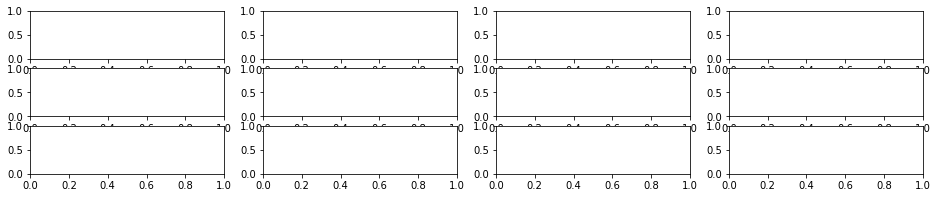

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,3))

for x_col, ax in (boston_features, axes):
    bost_df.plot(x=xcol, y=model, ax=ax, alpha=0.4, color='b')

- CRIM: per capita crime rate by town
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- CRIM: 0.15
- INDUS: 6.07
- CHAS: 1        
- RM:  6.1
- AGE: 33.2
- DIS: 7.6
- PTRATIO: 17
- B: 383
- LSTAT: 10.87
- RAD: 8
- TAX: 284

## Summary
Congratulations! You pre-processed the Boston Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Boston Housing data using statsmodels and scikit-learn!